# Aquila Wavelet analysis

Test of the wavelet analysis technique on Aquila.

In [10]:
import aplpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


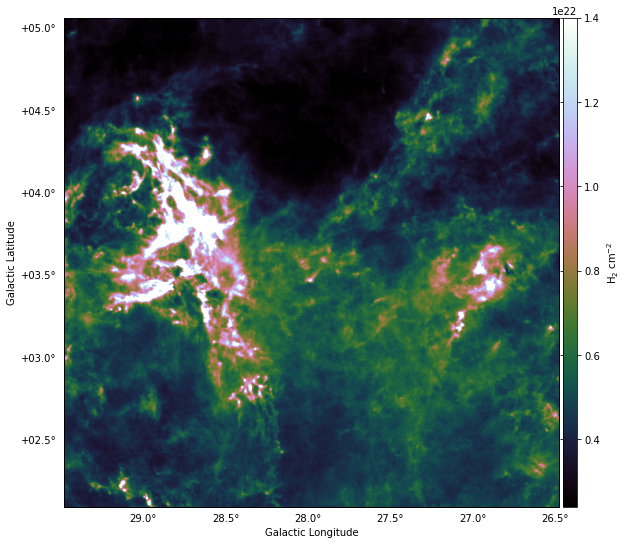

In [11]:
figfile = '/user/workdir/robitaij/fil2star/Herschel/Gould_Belt/HGBS_aquilaM2_column_density_map_gal_cut.fits'
fig = aplpy.FITSFigure(figfile, convention='calabretta')
fig.show_colorscale(vmin=2.4e21,vmax=1.4e22,cmap='cubehelix')
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
#fig.ticks.set_minor_frequency(0.1,0.1)
fig.ticks.set_xspacing(0.5)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'H$_{2}$ cm$^{-2}$')

In [7]:
from bokeh.plotting import figure as figbok
from bokeh.io import output_notebook
from bokeh.io import show as showbok
output_notebook()

from astropy.io import fits
from powspec import powspec
from wavan import fan_trans
from rebin import rebin

Loading BokehJS ...

In [4]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data

refact = 5.
im = rebin(im, (im.shape(0)/refact,im.shape(1)/refact))

In [ ]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60. * refact

#Fourier power spectrum
tab_k, spec_k = powspec(im, reso=1)

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [arcmin^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools)
f.line(tab_k, spec_k, legend='Fourier')

#Set a list of q
q = [2.5]*25

#Wavelet power spectrum
wt, S11a, wav_k, S1a, q = fan_trans(im, reso=reso, q=q, qdyn=True, double=False)

f.diamond(wav_k, S1a[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1a[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1a[2,:], legend='Gaussian',color='red',line_width=5)

showbok(f)

In [ ]:
np.save('/user/workdir/robitaij/fil2star/Herschel/analysis/aquila_density_wt.npy',wt)
np.save('/user/workdir/robitaij/fil2star/Herschel/analysis/aquila_density_S11a.npy',S11a)
np.save('/user/workdir/robitaij/fil2star/Herschel/analysis/aquila_density_wav_k.npy',wav_k)
np.save('/user/workdir/robitaij/fil2star/Herschel/analysis/aquila_density_S1a.npy',S1a)
np.save('/user/workdir/robitaij/fil2star/Herschel/analysis/aquila_density_q.npy',q)